In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import datetime
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [483]:
df_power = pd.read_csv("power.csv")
df_weather = pd.read_csv("weather.csv")

In [484]:
df_power.head()

,StartDate,Value (kWh),day_of_week,notes
0,2016-01-06 00:00:00,1.057,2,weekday
1,2016-01-06 01:00:00,1.171,2,weekday
2,2016-01-06 02:00:00,0.560,2,weekday
3,2016-01-06 03:00:00,0.828,2,weekday
4,2016-01-06 04:00:00,0.932,2,weekday


In [485]:
df_power.StartDate = pd.to_datetime(df_power.StartDate, format="%Y-%m-%d")

In [486]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   StartDate    35952 non-null  datetime64[ns]
 1   Value (kWh)  35952 non-null  float64       
 2   day_of_week  35952 non-null  int64         
 3   notes        35952 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [487]:
df_power.describe()

,Value (kWh),day_of_week
count,35952.000000,35952.000000
mean,0.891631,2.997330
std,0.908133,1.999024
min,0.064000,0.000000
25%,0.323750,1.000000
50%,0.501000,3.000000
75%,1.072000,5.000000
max,6.446000,6.000000


In [488]:
df_weather.head()

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
0,2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2
1,2016-02-06,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5
2,2016-03-06,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6
3,2016-04-06,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2
4,2016-05-06,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4


In [489]:
df_weather.Date = pd.to_datetime(df_weather.Date, format="%Y-%m-%d")

In [490]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1552 non-null   datetime64[ns]
 1   Day          1552 non-null   int64         
 2   Temp_max     1552 non-null   int64         
 3   Temp_avg     1552 non-null   float64       
 4   Temp_min     1552 non-null   int64         
 5   Dew_max      1552 non-null   int64         
 6   Dew_avg      1552 non-null   float64       
 7   Dew_min      1552 non-null   int64         
 8   Hum_max      1552 non-null   int64         
 9   Hum_avg      1552 non-null   float64       
 10  Hum_min      1552 non-null   int64         
 11  Wind_max     1552 non-null   int64         
 12  Wind_avg     1552 non-null   float64       
 13  Wind_min     1552 non-null   int64         
 14  Press_max    1552 non-null   float64       
 15  Press_avg    1552 non-null   float64       
 16  Press_

In [491]:
df_weather.describe()

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
count,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000
mean,15.726160,81.287371,71.752320,63.338273,66.615335,62.147423,56.939433,92.566366,74.365786,51.204897,15.855026,7.734987,1.375000,29.973840,29.903479,29.813273,0.157893,2.996134
std,8.800483,12.723409,12.490526,13.614699,12.279397,13.626795,15.246868,7.658203,11.700804,15.601436,4.842882,2.989969,2.500516,0.165958,0.160434,0.773583,0.658309,1.999029
min,1.000000,34.000000,27.600000,0.000000,18.000000,13.200000,0.000000,50.000000,31.500000,0.000000,6.000000,1.600000,0.000000,29.500000,28.800000,0.000000,0.000000,0.000000
25%,8.000000,74.000000,63.175000,52.750000,61.000000,54.075000,45.750000,90.000000,67.400000,41.000000,13.000000,5.700000,0.000000,29.900000,29.800000,29.700000,0.000000,1.000000
50%,16.000000,84.000000,74.300000,67.000000,70.000000,66.600000,62.000000,94.000000,75.000000,50.000000,15.000000,7.300000,0.000000,29.900000,29.900000,29.800000,0.000000,3.000000
75%,23.000000,92.000000,82.000000,75.000000,76.000000,73.400000,70.000000,97.000000,82.700000,61.000000,18.000000,9.400000,3.000000,30.100000,30.000000,29.900000,0.020000,5.000000
max,31.000000,101.000000,90.000000,83.000000,83.000000,79.800000,78.000000,100.000000,99.900000,97.000000,39.000000,23.900000,17.000000,30.600000,30.600000,30.500000,13.430000,6.000000


In [492]:
df_weather.Date.min()

Timestamp('2016-01-06 00:00:00')

In [493]:
df_power.StartDate.min()

Timestamp('2016-01-06 00:00:00')

In [494]:
final_df = pd.merge(df_power, df_weather, left_on="StartDate", right_on="Date", how="left")

In [495]:
final_df.drop(["Date", "day_of_week_y"], axis=1, inplace=True)

In [496]:
final_df.head(100)

,StartDate,Value (kWh),day_of_week_x,notes,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit
0,2016-01-06 00:00:00,1.057,2,weekday,1.0,85.0,74.8,68.0,74.0,71.4,66.0,100.0,89.4,65.0,21.0,9.5,0.0,29.8,29.8,29.7,0.00
1,2016-01-06 01:00:00,1.171,2,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-06 02:00:00,0.560,2,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-06 03:00:00,0.828,2,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-06 04:00:00,0.932,2,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-01-06 05:00:00,0.333,2,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-01-06 06:00:00,0.462,2,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-01-06 07:00:00,0.493,2,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-01-06 08:00:00,0.325,2,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-01-06 09:00:00,0.294,2,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [497]:
final_df.ffill(inplace=True) 

In [498]:
final_df.head(100)

,StartDate,Value (kWh),day_of_week_x,notes,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit
0,2016-01-06 00:00:00,1.057,2,weekday,1.0,85.0,74.8,68.0,74.0,71.4,66.0,100.0,89.4,65.0,21.0,9.5,0.0,29.8,29.8,29.7,0.00
1,2016-01-06 01:00:00,1.171,2,weekday,1.0,85.0,74.8,68.0,74.0,71.4,66.0,100.0,89.4,65.0,21.0,9.5,0.0,29.8,29.8,29.7,0.00
2,2016-01-06 02:00:00,0.560,2,weekday,1.0,85.0,74.8,68.0,74.0,71.4,66.0,100.0,89.4,65.0,21.0,9.5,0.0,29.8,29.8,29.7,0.00
3,2016-01-06 03:00:00,0.828,2,weekday,1.0,85.0,74.8,68.0,74.0,71.4,66.0,100.0,89.4,65.0,21.0,9.5,0.0,29.8,29.8,29.7,0.00
4,2016-01-06 04:00:00,0.932,2,weekday,1.0,85.0,74.8,68.0,74.0,71.4,66.0,100.0,89.4,65.0,21.0,9.5,0.0,29.8,29.8,29.7,0.00
5,2016-01-06 05:00:00,0.333,2,weekday,1.0,85.0,74.8,68.0,74.0,71.4,66.0,100.0,89.4,65.0,21.0,9.5,0.0,29.8,29.8,29.7,0.00
6,2016-01-06 06:00:00,0.462,2,weekday,1.0,85.0,74.8,68.0,74.0,71.4,66.0,100.0,89.4,65.0,21.0,9.5,0.0,29.8,29.8,29.7,0.00
7,2016-01-06 07:00:00,0.493,2,weekday,1.0,85.0,74.8,68.0,74.0,71.4,66.0,100.0,89.4,65.0,21.0,9.5,0.0,29.8,29.8,29.7,0.00
8,2016-01-06 08:00:00,0.325,2,weekday,1.0,85.0,74.8,68.0,74.0,71.4,66.0,100.0,89.4,65.0,21.0,9.5,0.0,29.8,29.8,29.7,0.00
9,2016-01-06 09:00:00,0.294,2,weekday,1.0,85.0,74.8,68.0,74.0,71.4,66.0,100.0,89.4,65.0,21.0,9.5,0.0,29.8,29.8,29.7,0.00


In [499]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35952 entries, 0 to 35951
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StartDate      35952 non-null  datetime64[ns]
 1   Value (kWh)    35952 non-null  float64       
 2   day_of_week_x  35952 non-null  int64         
 3   notes          35952 non-null  object        
 4   Day            35952 non-null  float64       
 5   Temp_max       35952 non-null  float64       
 6   Temp_avg       35952 non-null  float64       
 7   Temp_min       35952 non-null  float64       
 8   Dew_max        35952 non-null  float64       
 9   Dew_avg        35952 non-null  float64       
 10  Dew_min        35952 non-null  float64       
 11  Hum_max        35952 non-null  float64       
 12  Hum_avg        35952 non-null  float64       
 13  Hum_min        35952 non-null  float64       
 14  Wind_max       35952 non-null  float64       
 15  Wind_avg       3595

In [500]:
final_df.describe()

,Value (kWh),day_of_week_x,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit
count,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,0.891631,2.997330,15.670227,80.786382,71.277236,62.888518,66.261015,61.734579,56.506676,92.624166,74.487517,51.401869,15.899866,7.769025,1.391188,29.977303,29.906142,29.814753,0.160067
std,0.908133,1.999024,8.814220,12.648116,12.439042,13.488807,12.344934,13.680856,15.224359,7.746394,11.806793,15.713225,4.851600,3.006948,2.515244,0.167303,0.161982,0.786981,0.667907
min,0.064000,0.000000,1.000000,34.000000,27.600000,19.000000,18.000000,13.200000,10.000000,50.000000,31.500000,15.000000,6.000000,1.600000,0.000000,29.500000,28.800000,0.000000,0.000000
25%,0.323750,1.000000,8.000000,73.000000,62.900000,52.000000,60.000000,53.500000,45.000000,90.000000,67.500000,41.000000,13.000000,5.700000,0.000000,29.900000,29.800000,29.700000,0.000000
50%,0.501000,3.000000,16.000000,83.000000,73.800000,67.000000,70.000000,65.950000,62.000000,94.000000,75.200000,50.000000,15.000000,7.300000,0.000000,29.900000,29.900000,29.800000,0.000000
75%,1.072000,5.000000,23.000000,91.000000,81.600000,75.000000,76.000000,73.100000,70.000000,100.000000,82.800000,61.000000,18.000000,9.500000,3.000000,30.100000,30.000000,29.900000,0.020000
max,6.446000,6.000000,31.000000,101.000000,90.000000,83.000000,83.000000,79.800000,78.000000,100.000000,99.900000,97.000000,39.000000,23.900000,17.000000,30.600000,30.600000,30.500000,13.430000


In [501]:
final_df.index = final_df.StartDate

<AxesSubplot:xlabel='StartDate'>

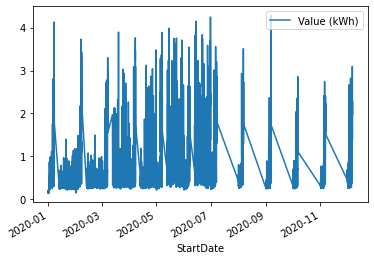

In [502]:
final_df.loc[final_df.StartDate > "2020-01-01", ["Value (kWh)"]].plot()

<AxesSubplot:xlabel='StartDate'>

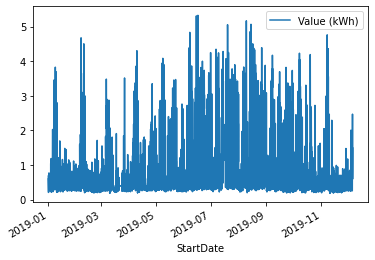

In [503]:
final_df.loc[(final_df.StartDate > "2019-01-01") & (final_df.StartDate < "2019-12-06"), ["Value (kWh)"]].plot()

<AxesSubplot:xlabel='StartDate'>

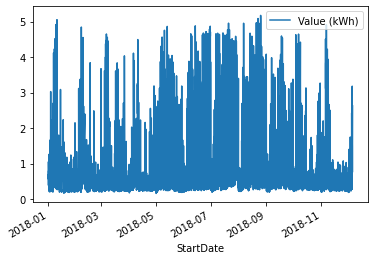

In [504]:
final_df.loc[(final_df.StartDate > "2018-01-01") & (final_df.StartDate < "2018-12-06"), ["Value (kWh)"]].plot()

In [505]:
final_df.notes.unique()

array(['weekday', 'weekend', 'vacation', 'COVID_lockdown'], dtype=object)

<AxesSubplot:xlabel='StartDate'>

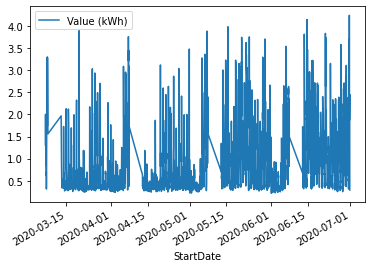

In [506]:
final_df.loc[final_df.notes == "COVID_lockdown", ["Value (kWh)"]].plot()

In [507]:
final_df = pd.get_dummies(final_df , 'notes')

In [508]:
final_df.StartDate.dt.strftime("%B")

StartDate
2016-01-06 00:00:00    January
2016-01-06 01:00:00    January
2016-01-06 02:00:00    January
2016-01-06 03:00:00    January
2016-01-06 04:00:00    January
                        ...   
2020-07-07 19:00:00       July
2020-07-07 20:00:00       July
2020-07-07 21:00:00       July
2020-07-07 22:00:00       July
2020-07-07 23:00:00       July
Name: StartDate, Length: 35952, dtype: object

In [509]:
final_df.StartDate.max()

Timestamp('2020-12-06 23:00:00')

In [510]:
final_df_2018 = final_df.groupby(final_df.loc[(final_df.StartDate >= "2018-01-01") & (final_df.StartDate <= "2018-07-31"), "StartDate"].dt.strftime('%B'))["Value (kWh)"].sum()

In [511]:
final_df_2019 = final_df.groupby(final_df.loc[(final_df.StartDate >= "2019-01-01") & (final_df.StartDate <= "2019-07-31"), "StartDate"].dt.strftime('%B'))["Value (kWh)"].sum()

In [512]:
final_df_2020 = final_df.groupby(final_df.loc[(final_df.StartDate >= "2020-01-01") & (final_df.StartDate <= "2020-07-31"), "StartDate"].dt.strftime('%B'))["Value (kWh)"].sum()

In [513]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July']

In [514]:
final_df_2018 = final_df_2018.reindex(new_order, axis=0)
final_df_2019 = final_df_2019.reindex(new_order, axis=0)
final_df_2020 = final_df_2020.reindex(new_order, axis=0)

In [515]:
data = pd.concat([final_df_2018, final_df_2019, final_df_2020], axis=1)
data.columns = ['2018', '2019', '2020']

In [516]:
data

,2018,2019,2020
StartDate,,,
January,515.6130,448.941000,308.422
February,446.9385,420.295000,319.968
March,530.8386,424.304649,389.783
April,472.9770,492.887000,388.873
May,720.7860,623.988000,617.520
June,935.3740,851.187000,677.441
July,1101.5585,896.157631,141.744


<AxesSubplot:label='cee00a06-d329-4d08-a2aa-00dd8a60ec3d', xlabel='StartDate', ylabel='numPatients6month'>

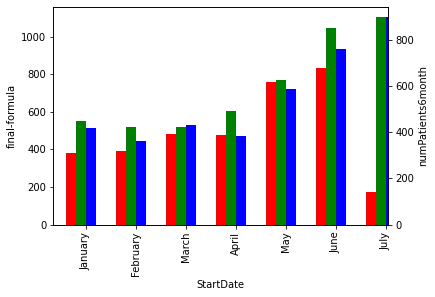

In [517]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.set_ylabel('final-formula')
ax2.set_ylabel('numPatients6month')

width=0.2
final_df_2018.plot(kind='bar',color='blue',ax=ax1,width=width,position=0)
final_df_2019.plot(kind='bar',color='green',ax=ax2,width=width,position=1)
final_df_2020.plot(kind='bar',color='red',ax=ax2,width=width,position=2)

<BarContainer object of 7 artists>

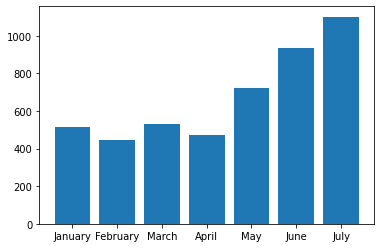

In [518]:
plt.bar(final_df_2018.index, final_df_2018.values)

<AxesSubplot:>

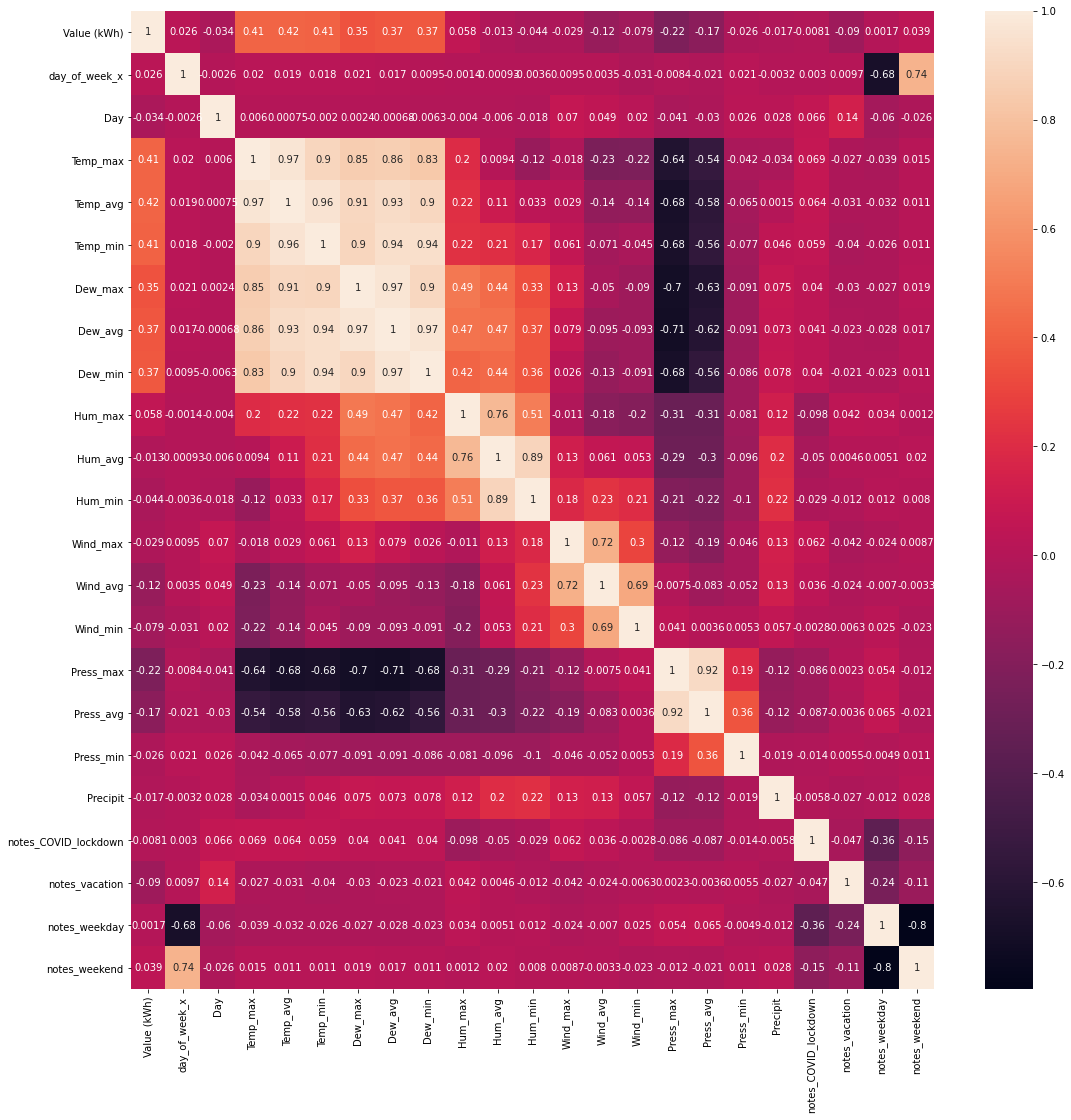

In [519]:
plt.figure(figsize=(18,18))
corr = final_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True)

In [520]:
final_df.drop(['notes_weekend'], axis = 1, inplace = True)

In [521]:
feature = final_df.loc[final_df.StartDate < "2020-01-01", final_df.columns[2:]]
target = final_df.loc[final_df.StartDate < "2020-01-01", final_df.columns[1]]

In [568]:
fs = SelectKBest(score_func=f_regression, k=4)

In [569]:
X_selected = fs.fit_transform(feature, target)

/Users/rashbir/opt/anaconda3/envs/hack/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [570]:
featuresdf = pd.DataFrame(X_selected)

In [571]:
featuresdf

,0,1,2,3
0,85.0,74.8,68.0,66.0
1,85.0,74.8,68.0,66.0
2,85.0,74.8,68.0,66.0
3,85.0,74.8,68.0,66.0
4,85.0,74.8,68.0,66.0
...,...,...,...,...
31411,60.0,48.8,38.0,22.0
31412,60.0,48.8,38.0,22.0
31413,60.0,48.8,38.0,22.0
31414,60.0,48.8,38.0,22.0


In [580]:
selected_features = ['Temp_max', 'Temp_avg', 'Temp_min', 'Dew_min']

In [581]:
X_train, X_test, y_train, y_test = train_test_split(
    featuresdf,
    target,
    test_size=0.3,
    random_state=0)

In [582]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [583]:
ridge = Ridge()
ridge_parameters = {'alpha': np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0 ])}
ridge_cv = GridSearchCV(ridge, ridge_parameters, scoring="neg_mean_squared_error", cv=10)

In [584]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([5.e+00, 5.e-01, 5.e-02, 5.e-03, 5.e-04, 1.e+00, 1.e-01, 1.e-02,
       1.e-03, 1.e-04, 0.e+00])},
             scoring='neg_mean_squared_error')

In [585]:
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 5.0}
-0.7214031876473175


In [586]:
lasso = Lasso()
lasso_parameters = {'alpha': np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0 ])}
lasso_cv = GridSearchCV(lasso, lasso_parameters, scoring="neg_mean_squared_error", cv=10)

In [587]:
lasso_cv.fit(X_train, y_train)

/Users/rashbir/opt/anaconda3/envs/hack/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/rashbir/opt/anaconda3/envs/hack/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/rashbir/opt/anaconda3/envs/hack/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7114.115916543109, tolerance: 1.717207313053737
  positive)
/Users/rashbir/opt/anaconda3/envs/hack/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to u

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([5.e+00, 5.e-01, 5.e-02, 5.e-03, 5.e-04, 1.e+00, 1.e-01, 1.e-02,
       1.e-03, 1.e-04, 0.e+00])},
             scoring='neg_mean_squared_error')

In [588]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0}
-0.7214034997184389


In [605]:
feature_minus2020 = final_df.loc[final_df.StartDate < "2020-01-01", selected_features]
target_mins2020 = final_df.loc[final_df.StartDate < "2020-01-01", final_df.columns[1]]

In [606]:
feature_minus2020.ffill(inplace=True)

In [607]:
scaler = StandardScaler()
feature_minus2020 = scaler.fit_transform(feature_minus2020)

In [617]:
lasso_new = Lasso(alpha = 0.0)

In [618]:
lasso_new.fit(feature_minus2020, target_mins2020)

/Users/rashbir/opt/anaconda3/envs/hack/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """Entry point for launching an IPython kernel.
/Users/rashbir/opt/anaconda3/envs/hack/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/rashbir/opt/anaconda3/envs/hack/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11336.053715263615, tolerance: 2.7464195242565714
  positive)


Lasso(alpha=0.0)

In [619]:
feature_2020 = final_df.loc[final_df.StartDate >= "2020-01-01", selected_features]
target_2020 = final_df.loc[final_df.StartDate >= "2020-01-01", final_df.columns[1]]

In [620]:
scaler = StandardScaler()
feature_2020 = scaler.fit_transform(feature_2020)

In [621]:
y_pred = lasso_new.predict(feature_2020)

In [622]:
pd.DataFrame({'y_pred': y_pred, 'y_test': target_2020}).to_csv("pred_com_DF.csv")

In [624]:
aa = pd.DataFrame({'y_pred': y_pred, 'y_test': target_2020})

In [628]:
(aa.y_pred - aa.y_test).mean()

0.1755923456212696